In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Downloads/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum().sum()

0

In [7]:
df.shape

(1025, 14)

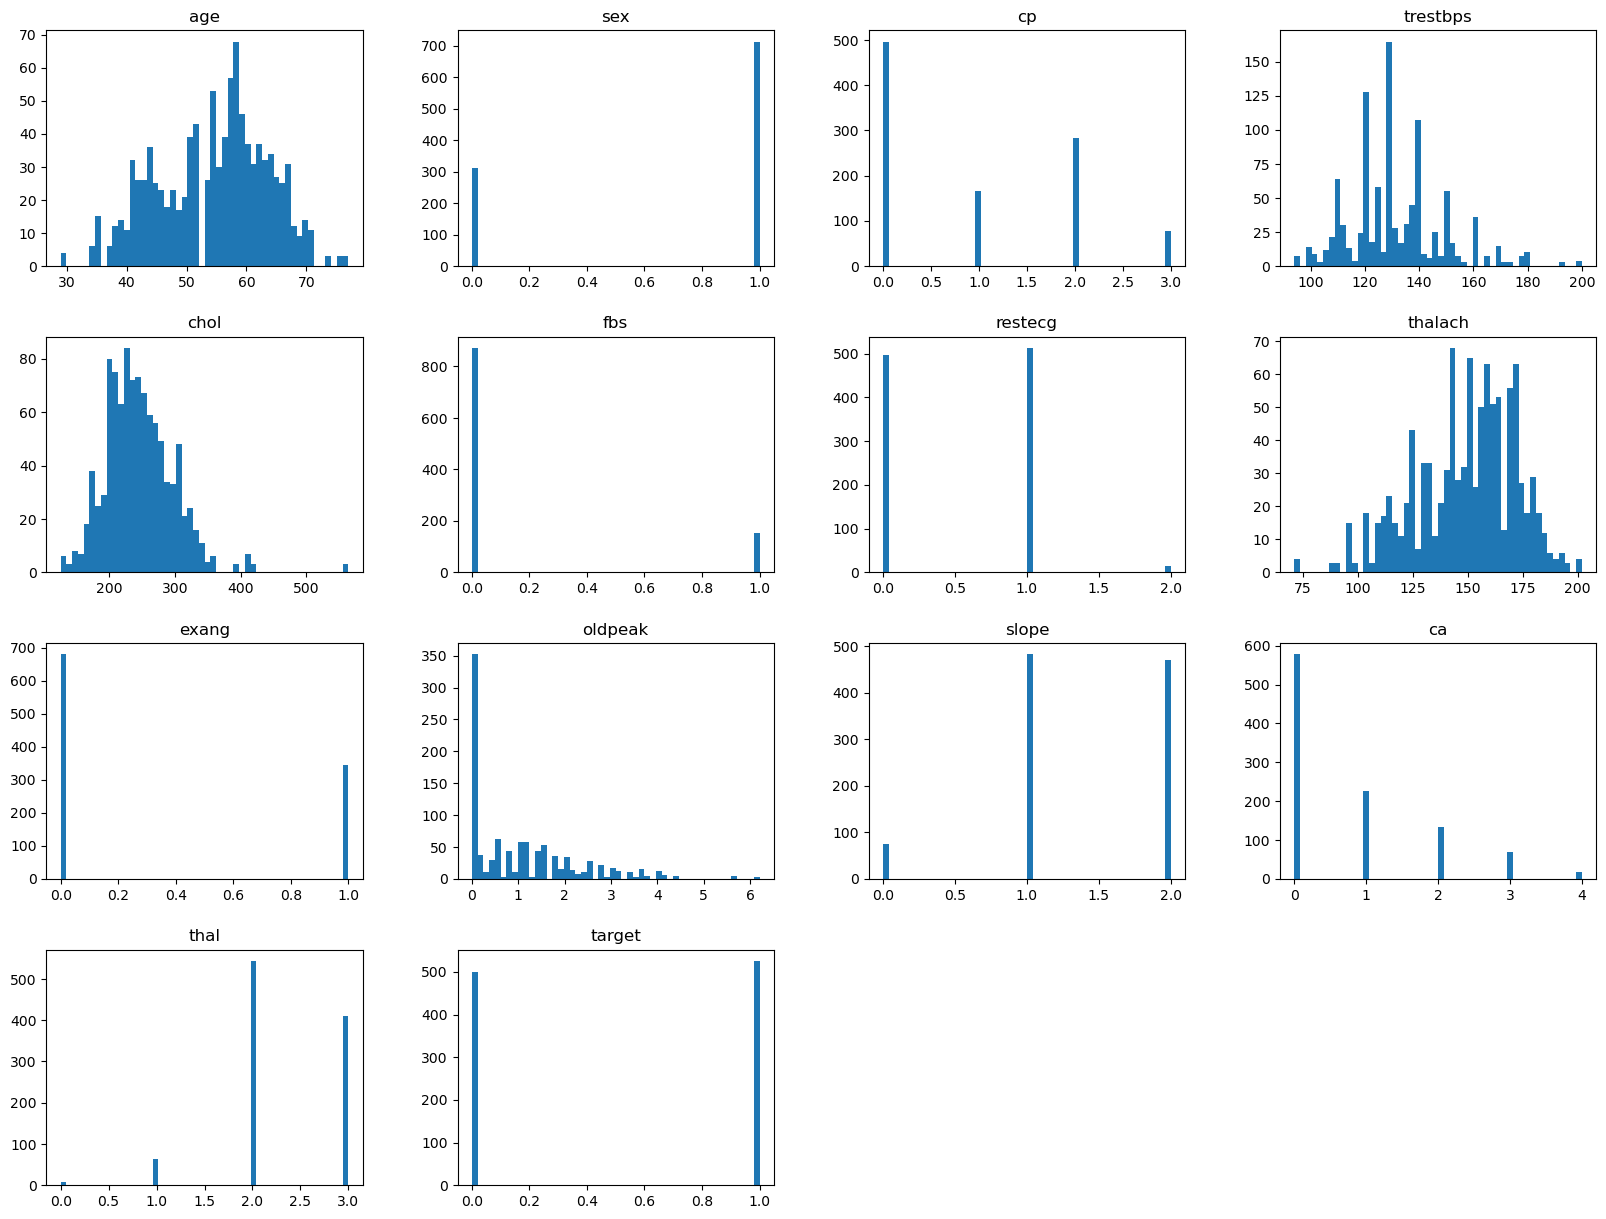

In [11]:
# plotting histograms of all numeric values
df.hist(bins=50,grid=False,figsize=(20,15));

### Questions
1. How many people have heart disease, and how many people don't have heart disease?
2. People of which sex have the most heart disease?
3. People of which sex have which type of chest pain most?
4. People with which chest pain are most prone to have heart disease?

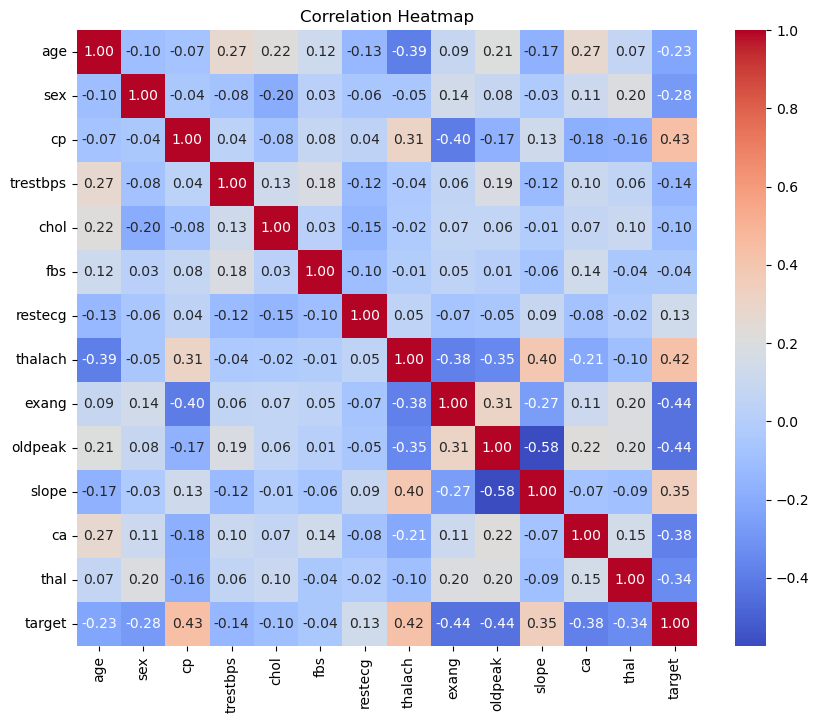

In [62]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### 1. How many people have heart disease, and how many people don't have heart disease?

In [13]:
dt = df.target.value_counts()
dt

target
1    526
0    499
Name: count, dtype: int64

Text(0, 0.5, 'Amount')

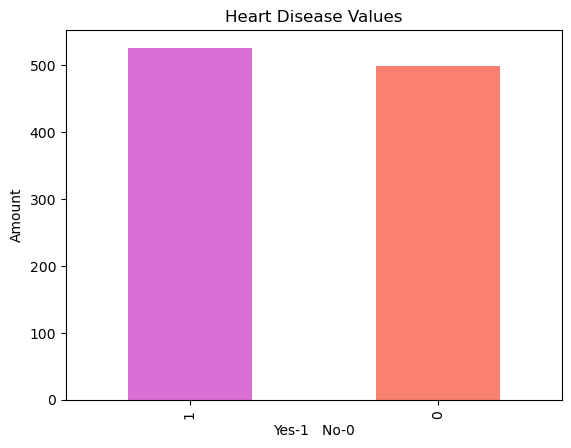

In [15]:
dt.plot(kind='bar',color=['orchid','salmon'])
plt.title('Heart Disease Values')
plt.xlabel('Yes-1   No-0')
plt.ylabel('Amount')

In [21]:
dx=df.sex.value_counts()

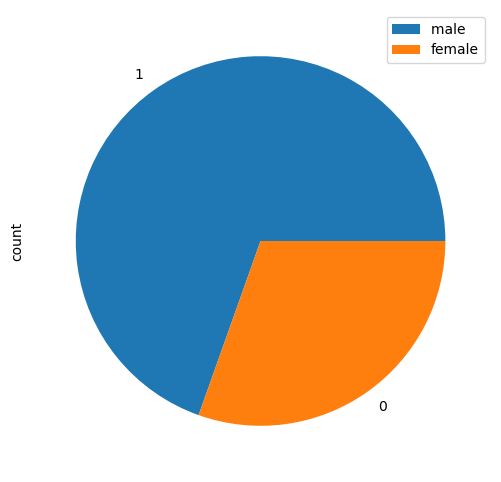

In [25]:
dx.plot(kind='pie',figsize=(8,6))
plt.legend(['male ',"female"])

#### 2. People of which sex have the most heart disease?

In [28]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


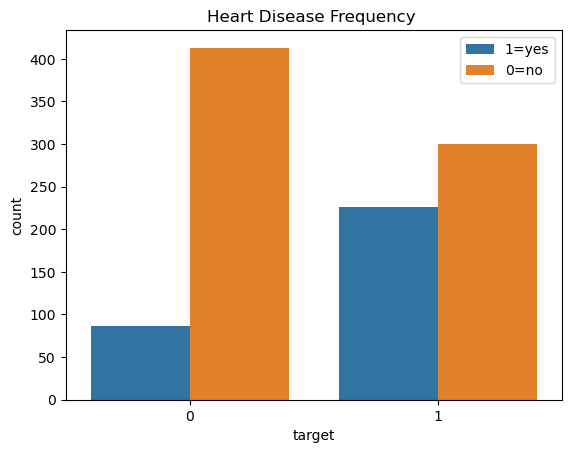

In [34]:
sns.countplot(x='target',data=df,hue='sex')
plt.title('Heart Disease Frequency ')
plt.legend(['1=yes','0=no'])

#### 3. People of which sex have which type of chest pain most?

In [39]:
dc = df.cp.value_counts()
dc

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

Text(0.5, 1.0, 'Pain vs Count')

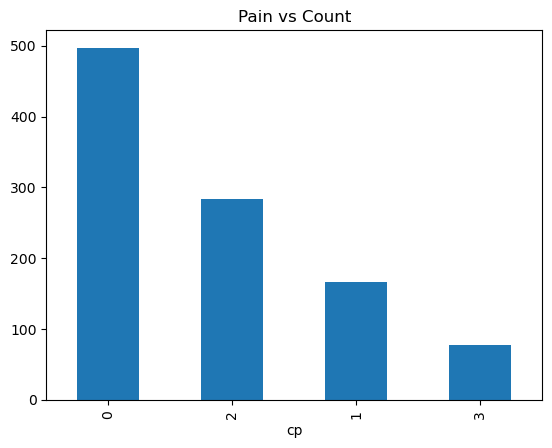

In [41]:
dc.plot(kind='bar')
plt.title('Pain vs Count')

In [45]:
dcc = pd.crosstab(df.sex,df.cp)
dcc

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


Text(0.5, 0, '0 = Male,1 = Female')

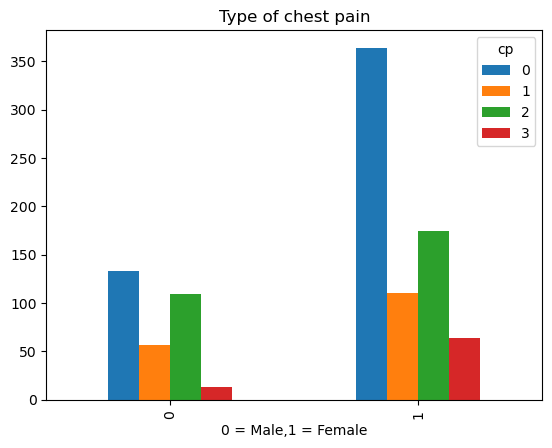

In [51]:
dcc.plot(kind='bar')
plt.title('Type of chest pain')
plt.xlabel('0 = Male,1 = Female')

#### 4. People with which chest pain are most prone to have heart disease?

In [54]:
dp = pd.crosstab(df.cp,df.target)
dp

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


<Axes: xlabel='cp', ylabel='count'>

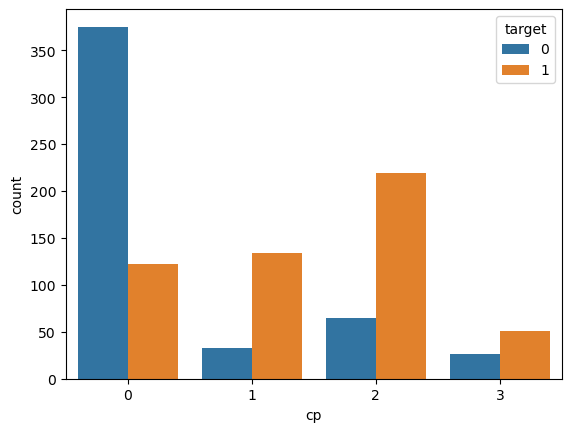

In [56]:
sns.countplot(x='cp',data=df,hue='target')

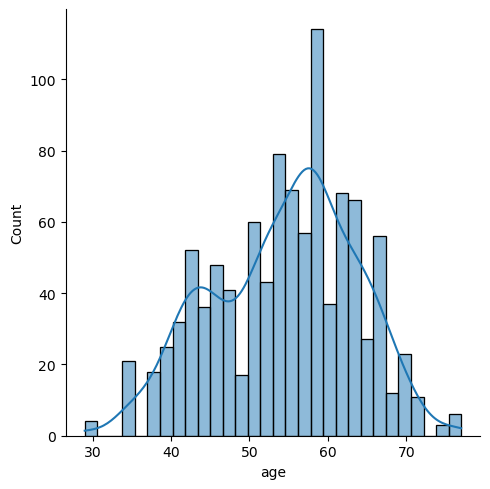

In [58]:
sns.displot(x='age',data=df,bins=30,kde=True)

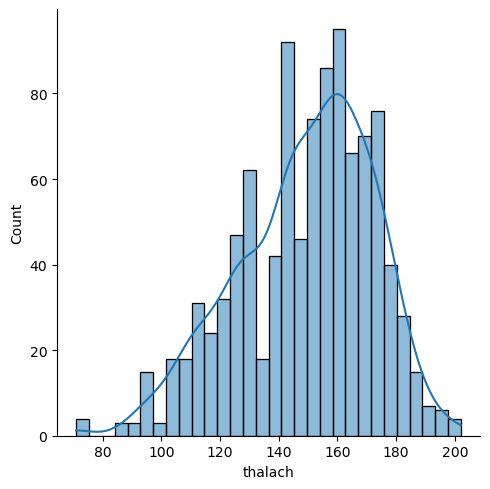

In [60]:
sns.displot(x='thalach',data=df,bins=30,kde=True)

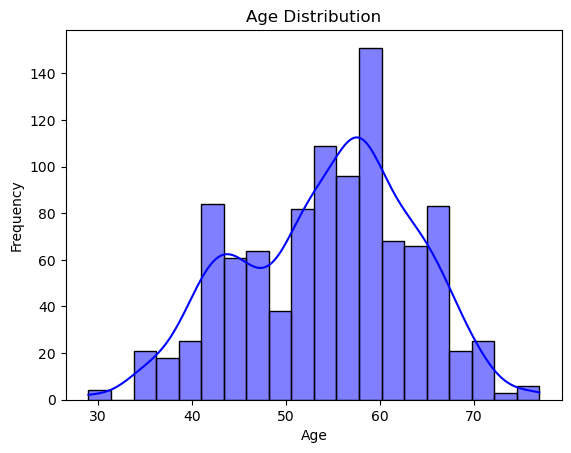

In [64]:
# Age distribution
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9532\1990652542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set2')


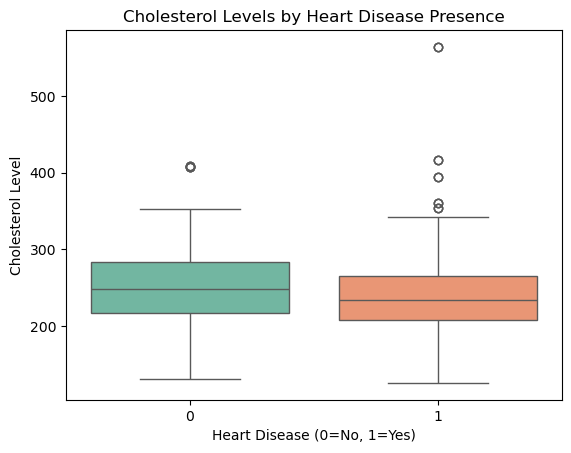

In [66]:
# Cholesterol levels by target
sns.boxplot(x='target', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Cholesterol Level')
plt.show()